In [ ]:
import nest_asyncio
import react_agent.prompts
import importlib
import state 
import nodes_concurrent
from langgraph.graph import START, END, StateGraph
from IPython.display import Image, display
from langchain_core.runnables.graph import MermaidDrawMethod
from typing import Dict, Any, Tuple, Literal

importlib.reload(prompts)
importlib.reload(state)
importlib.reload(nodes_concurrent)
from nodes_concurrent import assistant, HoneypotConfigurationNode, FirewallConfigurationNode, NetworkStatusNode, summarize_logs
from state import HoneypotState
nest_asyncio.apply()



def display_graph(graph, width=250, height=300):

    png_bytes = graph.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)

    display(Image(data=png_bytes, format="png", width=width, height=height)
)

SyntaxError: invalid syntax (4264494668.py, line 2)

In [3]:
builder = StateGraph(HoneypotState)

# # Define nodes: 
def build_graph(builder: StateGraph):
    # Define nodes: 
    builder.add_node("assistant", assistant)
    builder.add_node("FirewallConfigurationNode", FirewallConfigurationNode)
    builder.add_node("NetworkStatusNode", NetworkStatusNode)
    builder.add_node("summarize", summarize_logs)
    builder.add_node("HoneypotConfigurationNode", HoneypotConfigurationNode)

    # Build the graph
    builder.add_edge(START, "FirewallConfigurationNode")
    builder.add_edge(START, "NetworkStatusNode")
    builder.add_edge(START, "HoneypotConfigurationNode")

    builder.add_edge("NetworkStatusNode", "summarize")
    builder.add_edge(["FirewallConfigurationNode", "HoneypotConfigurationNode","summarize"], "assistant")
    builder.add_edge("assistant", END)

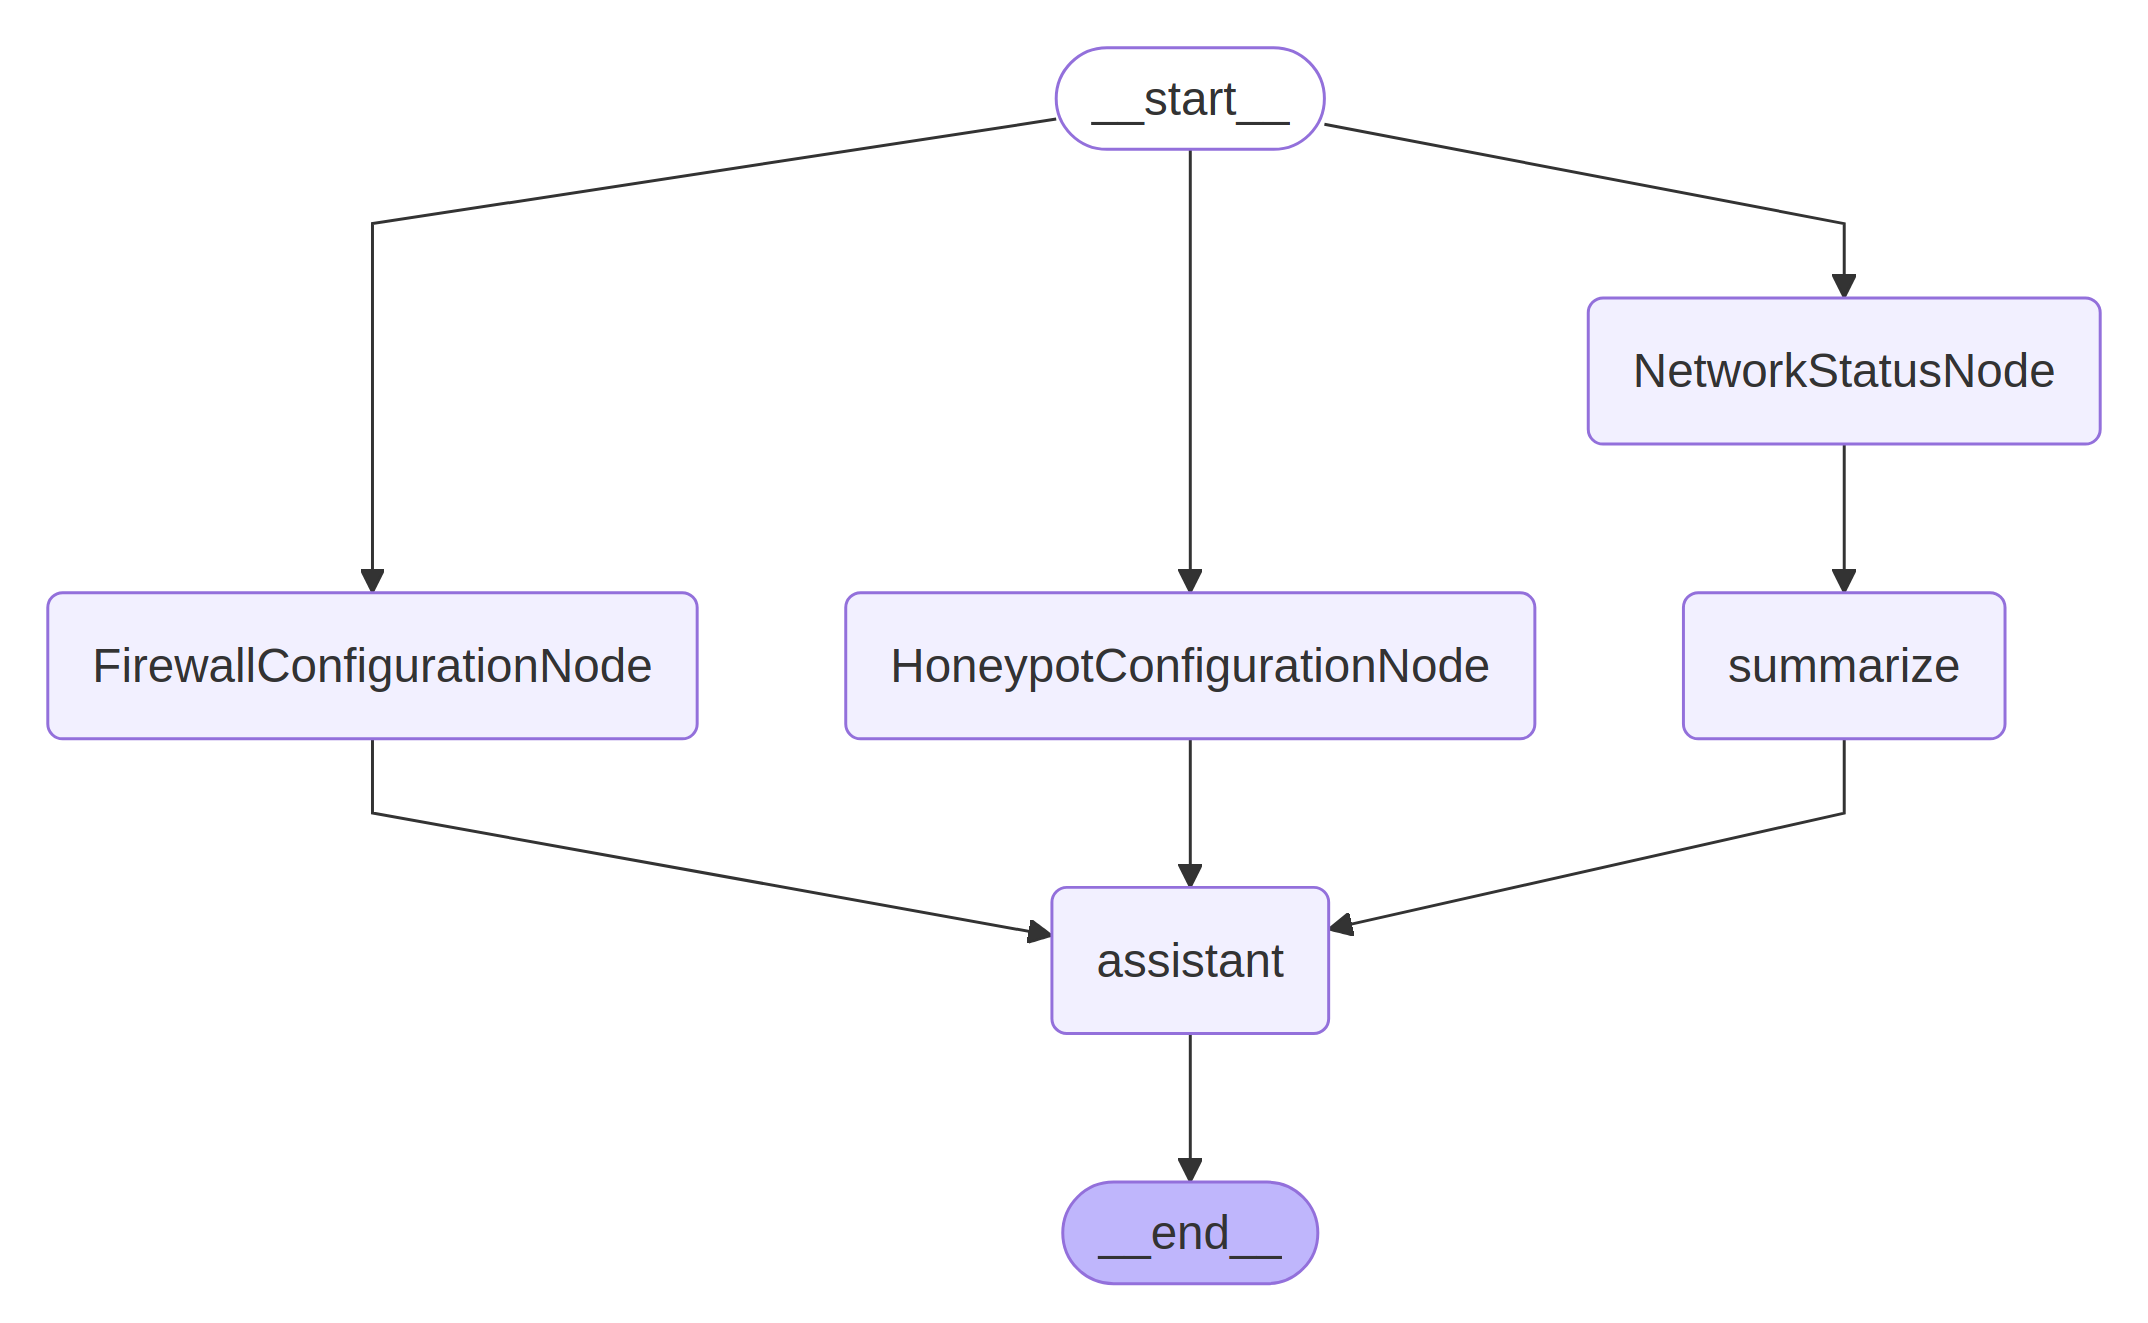

In [4]:
build_graph(builder)

graph = builder.compile()
display_graph(graph, width=500, height=500)

In [5]:
# Create an initial state
initial_state = HoneypotState(
    messages = [],  
    network_logs = [],
    firewall_config= "No firewall configuration found",
    honeypotStatus = [],
)

response = graph.invoke(initial_state)

Firewall nodeHoneypot node

Network node
Summarizing node
Assistant node


In [6]:
for m in response['messages']:
    m.pretty_print()

================================== Ai Message ==================================

Based on the structured analysis of the network logs and the honeypot configuration, I will generate iptables rules to protect our honeypot and strategically expose ports for engaging potential attackers. Let’s break down the situation and form a strategic response.

### Current Situation
1. **High-Frequency Source**: `172.17.0.1` is generating a high number of requests (250 requests), indicating potential scanning or attack attempts.
2. **Suspicious Port Cluster**: Extensive use of port `2222/TCP` is noted.
3. **Behavioral Red Flags**: 
   - Scan patterns indicate multiple ports accessed rapidly by `172.17.0.1`.
   - Short-lived sessions could suggest scanning or brute force attacks.

### Honeypot Environment
- **Containers**:
  1. **MQTT Honeypot** (Ports: `1883`, `4444`).
  2. **MSSQL Honeypot** (Port: `1433`).
  3. **SSH Honeypot** (Port: `2222`).

### Strategic Plan
Given the current logs and the nee